In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import math

In [3]:
iot_data = pd.read_csv("IOT-temp.csv")
iot_data.head()

,id,room_id/id,noted_date,temp,out/in
0,__export__.temp_log_196134_bd201015,Room Admin,08-12-2018 09:30,29,In
1,__export__.temp_log_196131_7bca51bc,Room Admin,08-12-2018 09:30,29,In
2,__export__.temp_log_196127_522915e3,Room Admin,08-12-2018 09:29,41,Out
3,__export__.temp_log_196128_be0919cf,Room Admin,08-12-2018 09:29,41,Out
4,__export__.temp_log_196126_d30b72fb,Room Admin,08-12-2018 09:29,31,In


In [4]:
print("Count of missing value per column ")
iot_data.isnull().sum()

Count of missing value per column 


id            0
room_id/id    0
noted_date    0
temp          0
out/in        0
dtype: int64

In [5]:
iot_data["unique_id"] = iot_data.index

In [6]:
print("Geeting detail information of each column")
iot_data.info()

Geeting detail information of each column
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97606 entries, 0 to 97605
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          97606 non-null  object
 1   room_id/id  97606 non-null  object
 2   noted_date  97606 non-null  object
 3   temp        97606 non-null  int64 
 4   out/in      97606 non-null  object
 5   unique_id   97606 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 4.5+ MB


In [7]:
print("Changing name of columns")
iot_data = iot_data.rename(columns = {"room_id/id":"room_id"})
iot_data = iot_data.rename(columns = {"out/in":"out_in"})

Changing name of columns


In [8]:
print("Maximum temperature in inside and outside is ")
iot_data.groupby("out_in").temp.max()

Maximum temperature in inside and outside is 


out_in
In     41
Out    51
Name: temp, dtype: int64

In [9]:
import datetime 
from datetime import date ,time,datetime

In [10]:
iot_data["date_value"] = iot_data['noted_date'].apply(lambda x: datetime.strptime(x, '%d-%m-%Y %M:%S'))

In [11]:
iot_data["date"] = pd.to_datetime(iot_data.noted_date).dt.date
iot_data["year"] = pd.to_datetime(iot_data.noted_date).dt.year
iot_data["month"] = pd.to_datetime(iot_data.noted_date).dt.month
iot_data["weekday"]= pd.to_datetime(iot_data.noted_date).dt.dayofweek

In [12]:
iot_data.weekday.unique()

array([6, 3, 1, 5, 0, 4, 2], dtype=int64)

In [13]:
condition = [
    (iot_data.weekday ==5),
    (iot_data.weekday ==6),
]

choice = ('weekend','weekend')
iot_data['weekday_tag'] = np.select(condition,choice,default = 'weekday')

In [14]:
iot_data.head()

,id,room_id,noted_date,temp,out_in,unique_id,date_value,date,year,month,weekday,weekday_tag
0,__export__.temp_log_196134_bd201015,Room Admin,08-12-2018 09:30,29,In,0,2018-12-08 00:09:30,2018-08-12,2018,8,6,weekend
1,__export__.temp_log_196131_7bca51bc,Room Admin,08-12-2018 09:30,29,In,1,2018-12-08 00:09:30,2018-08-12,2018,8,6,weekend
2,__export__.temp_log_196127_522915e3,Room Admin,08-12-2018 09:29,41,Out,2,2018-12-08 00:09:29,2018-08-12,2018,8,6,weekend
3,__export__.temp_log_196128_be0919cf,Room Admin,08-12-2018 09:29,41,Out,3,2018-12-08 00:09:29,2018-08-12,2018,8,6,weekend
4,__export__.temp_log_196126_d30b72fb,Room Admin,08-12-2018 09:29,31,In,4,2018-12-08 00:09:29,2018-08-12,2018,8,6,weekend


In [15]:
iot_data1 = iot_data.groupby('month').temp.agg(['min','max'])
iot_data1['month_1'] = iot_data1.index

In [16]:
print("Monthwise minimum and maximum temperature is ")
iot_data1

Monthwise minimum and maximum temperature is 


,min,max,month_1
month,,,
1,29,48,1
2,30,48,2
3,21,49,3
4,23,49,4
5,24,48,5
6,24,42,6
7,25,41,7
8,29,42,8
9,24,51,9


In [17]:
iot_data8 = pd.merge(left = iot_data,right =iot_data1,how = 'left',left_on = "month" ,right_on = "month_1")
iot_data8.head()

,id,room_id,noted_date,temp,out_in,unique_id,date_value,date,year,month,weekday,weekday_tag,min,max,month_1
0,__export__.temp_log_196134_bd201015,Room Admin,08-12-2018 09:30,29,In,0,2018-12-08 00:09:30,2018-08-12,2018,8,6,weekend,29,42,8
1,__export__.temp_log_196131_7bca51bc,Room Admin,08-12-2018 09:30,29,In,1,2018-12-08 00:09:30,2018-08-12,2018,8,6,weekend,29,42,8
2,__export__.temp_log_196127_522915e3,Room Admin,08-12-2018 09:29,41,Out,2,2018-12-08 00:09:29,2018-08-12,2018,8,6,weekend,29,42,8
3,__export__.temp_log_196128_be0919cf,Room Admin,08-12-2018 09:29,41,Out,3,2018-12-08 00:09:29,2018-08-12,2018,8,6,weekend,29,42,8
4,__export__.temp_log_196126_d30b72fb,Room Admin,08-12-2018 09:29,31,In,4,2018-12-08 00:09:29,2018-08-12,2018,8,6,weekend,29,42,8


In [18]:
iot_data2 = iot_data1.drop(['month_1'],axis = 1)
iot_data3 = iot_data.groupby(['weekday_tag']).temp.agg(['min','max'])
iot_data4 = iot_data.groupby(['out_in']).temp.agg(['min','max'])
iot_data5 = iot_data.groupby('out_in').unique_id.count()
iot_data6 = iot_data.groupby('weekday_tag').unique_id.count()
iot_data7 = iot_data.groupby('month').unique_id.count()

weekday or weekend day wise number of measurement inside and outside temperature


<AxesSubplot:xlabel='out_in', ylabel='count'>

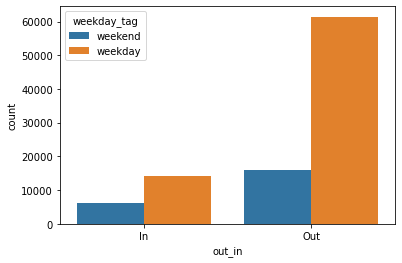

In [19]:
print("weekday or weekend day wise number of measurement inside and outside temperature")
sns.countplot(x = iot_data.out_in,hue = iot_data.weekday_tag)

Minimum and maximum temperature monthwise is 


<AxesSubplot:xlabel='month'>

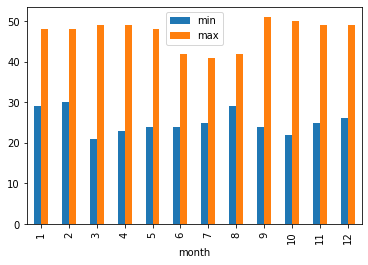

In [20]:
print("Minimum and maximum temperature monthwise is ")
iot_data2.plot.bar()

Weekwise minimum and maximum temperature


<AxesSubplot:xlabel='weekday_tag'>

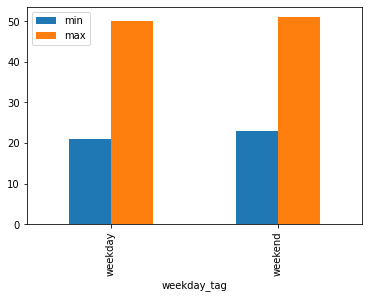

In [21]:
print("Weekwise minimum and maximum temperature")
iot_data3.plot.bar()

Minimum and maximu teperature inside and outside room


<AxesSubplot:xlabel='out_in'>

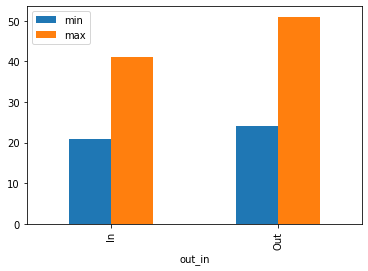

In [22]:
print('Minimum and maximu teperature inside and outside room')
iot_data4.plot.bar()

In [23]:
print("Count of meansuremnt inside and outside room")
iot_data5

Count of meansuremnt inside and outside room


out_in
In     20345
Out    77261
Name: unique_id, dtype: int64

In [24]:
print("Count of weekday and weekend measurement")
iot_data6

Count of weekday and weekend measurement


weekday_tag
weekday    75448
weekend    22158
Name: unique_id, dtype: int64

In [25]:
print("Monthwise count of temperature measure")
iot_data7

Monthwise count of temperature measure


month
1      1188
2      1250
3      4579
4      3334
5      1224
6      2976
7      2181
8      1764
9     11892
10    44651
11    16269
12     6298
Name: unique_id, dtype: int64

In [26]:
iot_data9 = iot_data8

In [28]:
print("minimum date is ",iot_data9.date.min()," and maximum date is ",iot_data9.date.max())

minimum date is  2018-01-11  and maximum date is  2018-12-10


In [29]:
print("Time series analysis has Started")

Time series analysis has Started


In [30]:
print("Deleting unnecessory columns")
iot_data10 =iot_data9.drop(['id','room_id','noted_date','out_in','unique_id','date_value','date','year','weekday','weekday_tag','min','max','month_1'],axis = 1)

Deleting unnecessory columns


In [31]:
print("Grouping data monthwise")
iot_data10 = iot_data10.sort_values('month')
iot_data10.isnull().sum()

Grouping data monthwise


temp     0
month    0
dtype: int64

In [32]:
print("Finding average temperature monthwise and sorting in accending value also assign date to index")
iot_data10 = iot_data10.groupby(['month']).temp.mean().reset_index()
iot_data10 =  iot_data10.assign(date =['2018-01-01','2018-02-01','2018-03-01','2018-04-01','2018-05-01','2018-06-01','2018-07-01','2018-08-01','2018-09-01','2018-10-01','2018-11-01','2018-12-01'])
iot_data10 = iot_data10.set_index('date')
y = iot_data10.temp
y.head()

Finding average temperature monthwise and sorting in accending value also assign date to index


date
2018-01-01    38.694444
2018-02-01    38.806400
2018-03-01    32.907403
2018-04-01    32.881824
2018-05-01    36.357843
Name: temp, dtype: float64

Average temperature plot monthwise


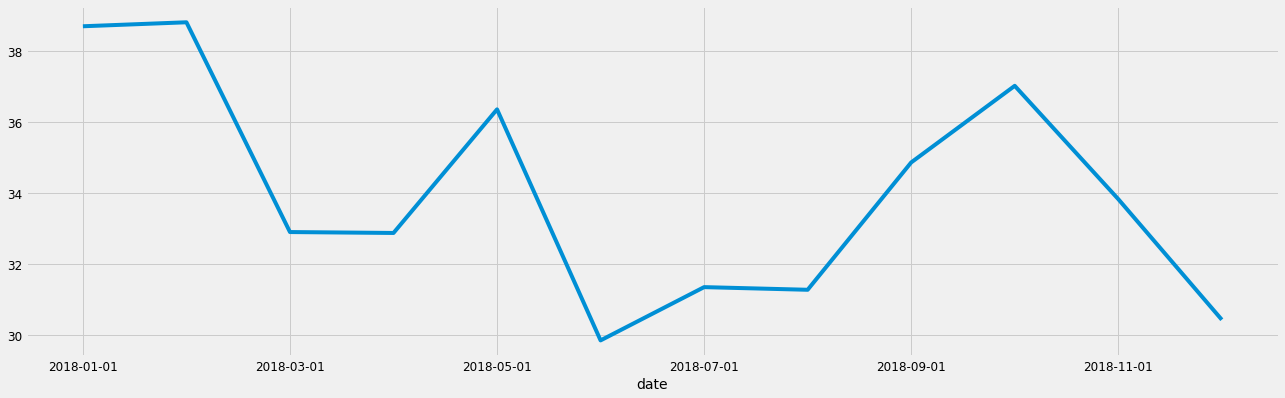

In [33]:
print("Average temperature plot monthwise")
y.plot(figsize = (20,6))
plt.show()

In [34]:
p = d = q = range(0,2)
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0],x[1],x[2],12) for x in list(itertools.product(p,d,q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [35]:
print("Selecting best AIC For Model")
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order = param,
                                            seasonal_order = param_seasonal,
                                            enforce_stationarity = False,
                                            enforce_invertibility = False)
            result = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param,param_seasonal,result.aic))
        except :
            continue
print("Selecte AIC is 50")

Selecting best AIC For Model
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:110.61084776649062
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:4.0
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2.0
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:4.0
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:4.0
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:6.0
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:4.0
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:6.0
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:92.12274468217318
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:6.0
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:4.0
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:6.0


C:\Users\Ashwanth Ram A S\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ashwanth Ram A S\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ashwanth Ram A S\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ashwanth Ram A S\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ashwanth Ram A S\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information 

ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:6.0
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:8.0
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:6.0
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:8.0
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:56.064105061388844
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:4.0
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:2.0
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:4.0
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:4.0
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:6.0
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:4.0
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:6.0
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:49.17795547563639
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:6.0
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:4.0
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:6.0
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:6.0
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:8.0
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:6.0


C:\Users\Ashwanth Ram A S\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ashwanth Ram A S\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ashwanth Ram A S\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ashwanth Ram A S\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ashwanth Ram A S\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information 

ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:8.0
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:61.60089652513166
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:6.0
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:4.0
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:6.0
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:6.0
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:8.0
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:6.0
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:8.0
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:57.04703936297741


C:\Users\Ashwanth Ram A S\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ashwanth Ram A S\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ashwanth Ram A S\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ashwanth Ram A S\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ashwanth Ram A S\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information 

ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:8.0
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:6.0
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:8.0
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:8.0
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:10.0
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:8.0
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:10.0
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:57.75786765191263
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:6.0
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:4.0
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:6.0
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:6.0
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:8.0
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:6.0
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:8.0
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:50.089138900939936
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:8.0
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:6.0
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:8.0
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:8.0
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:10.0
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:8.0
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:10.0
Selecte AIC is 50


C:\Users\Ashwanth Ram A S\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ashwanth Ram A S\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Ashwanth Ram A S\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ashwanth Ram A S\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ashwanth Ram A S\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum 

In [36]:
print("Model summary is")
mod = sm.tsa.statespace.SARIMAX(y,
                               order =(1,1,1),
                               param_seasonal = (0,0,0,12),
                               enforce_stationarity = False,
                               enforce_invertibility = False)
result = mod.fit()
print(result.summary().tables[1])

Model summary is
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2841      0.631      0.450      0.652      -0.953       1.521
ma.L1         -1.0000   3.37e+04  -2.97e-05      1.000    -6.6e+04     6.6e+04
sigma2         6.4980   2.19e+05   2.97e-05      1.000   -4.29e+05    4.29e+05


C:\Users\Ashwanth Ram A S\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ashwanth Ram A S\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


AttributeError: 'PredictionResults' object has no attribute 'plot'

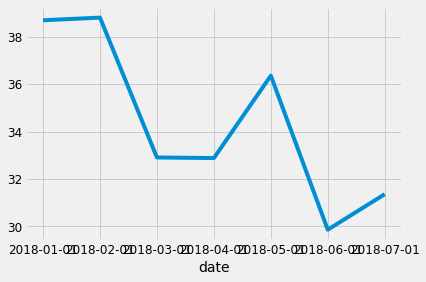

In [37]:
pred = result.get_prediction(start = pd.to_datetime('2018-07-01'),dynamic = False)
pred_ci = pred.conf_int()

ax = y['2018-01-01':'2018-07-01'].plot(label = 'observed')
pred.plot(ax = ax,label ='Forecast',alpha= 0.7,figsize = (100,8))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)


ax.set_xlabel('date')
ax.set_ylabel('temp')
plt.legend

plt.show()

AttributeError: 'PredictionResults' object has no attribute 'plot'

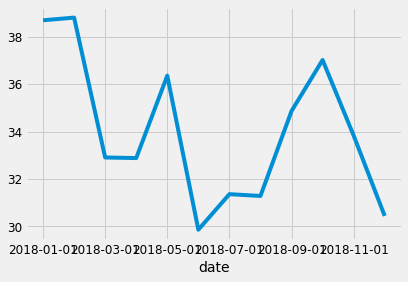

In [38]:
pred = result.get_prediction(start = pd.to_datetime('2018-07-01'),dynamic = False)
pred_ci = pred.conf_int()

ax = y['2018-01-01':].plot(label = 'observed')

pred.plot(ax = ax,label ='Forecast',alpha= 0.6,figsize = (14,14))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('date')
ax.set_ylabel('temp')
plt.legend

plt.show()